# Применение решающего дерева

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
data = pd.read_csv("http://freakonometrics.free.fr/german_credit.csv")

In [17]:
data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [55]:
german_data = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/statlog/german/german.data", sep=" ", header=None)
german_data.columns = ["Account Balance", "Duration of Credit (month)", "Payment Status of Previous Credit",
                "Purpose", "CreditAmount", "Value Savings/Stocks", "Length of current employment", "Instalment per cent",
                "Sex & Marital Status", "Guarantors", "Duration in Current address", "Most valuable available asset",
                "Age (years)", "Concurrent Credits", "Type of apartment", "No of Credits at this Bank", "Occupation", 
                "No of dependents", "Telephone", "Foreign Worker", "target"]

In [58]:
german_data[(german_data.CreditAmount == 1049) | (german_data.CreditAmount == 2799)]

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,CreditAmount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,...,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,target
586,A11,9,A34,A40,2799,A61,A73,2,A93,A101,...,A121,36,A143,A151,2,A173,2,A191,A201,1
926,A11,18,A34,A42,1049,A61,A72,4,A92,A101,...,A122,21,A143,A151,1,A173,1,A191,A201,1


Категориальные признаки в данных на UCI репозитории записаны в виде A(№ признака)номер "варианта". В данных data обрезаны A и номер признака. 

In [18]:
from sklearn import tree

In [23]:
import pydotplus

from IPython.display import Image

In [34]:
data.rename(index=str, columns={"Sex & Marital Status": "Sex and Marital Status"}, inplace=True)

In [94]:
model = tree.DecisionTreeClassifier(max_depth=4)
model.fit(data.iloc[:, 1:], data[[0]])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [95]:
dot_data = tree.export_graphviz(model, out_file="tree.out", 
                                feature_names = data.columns[1:],
                                class_names=["no", "yes"],
                                filled=True, rounded=True,
                                special_characters=True)

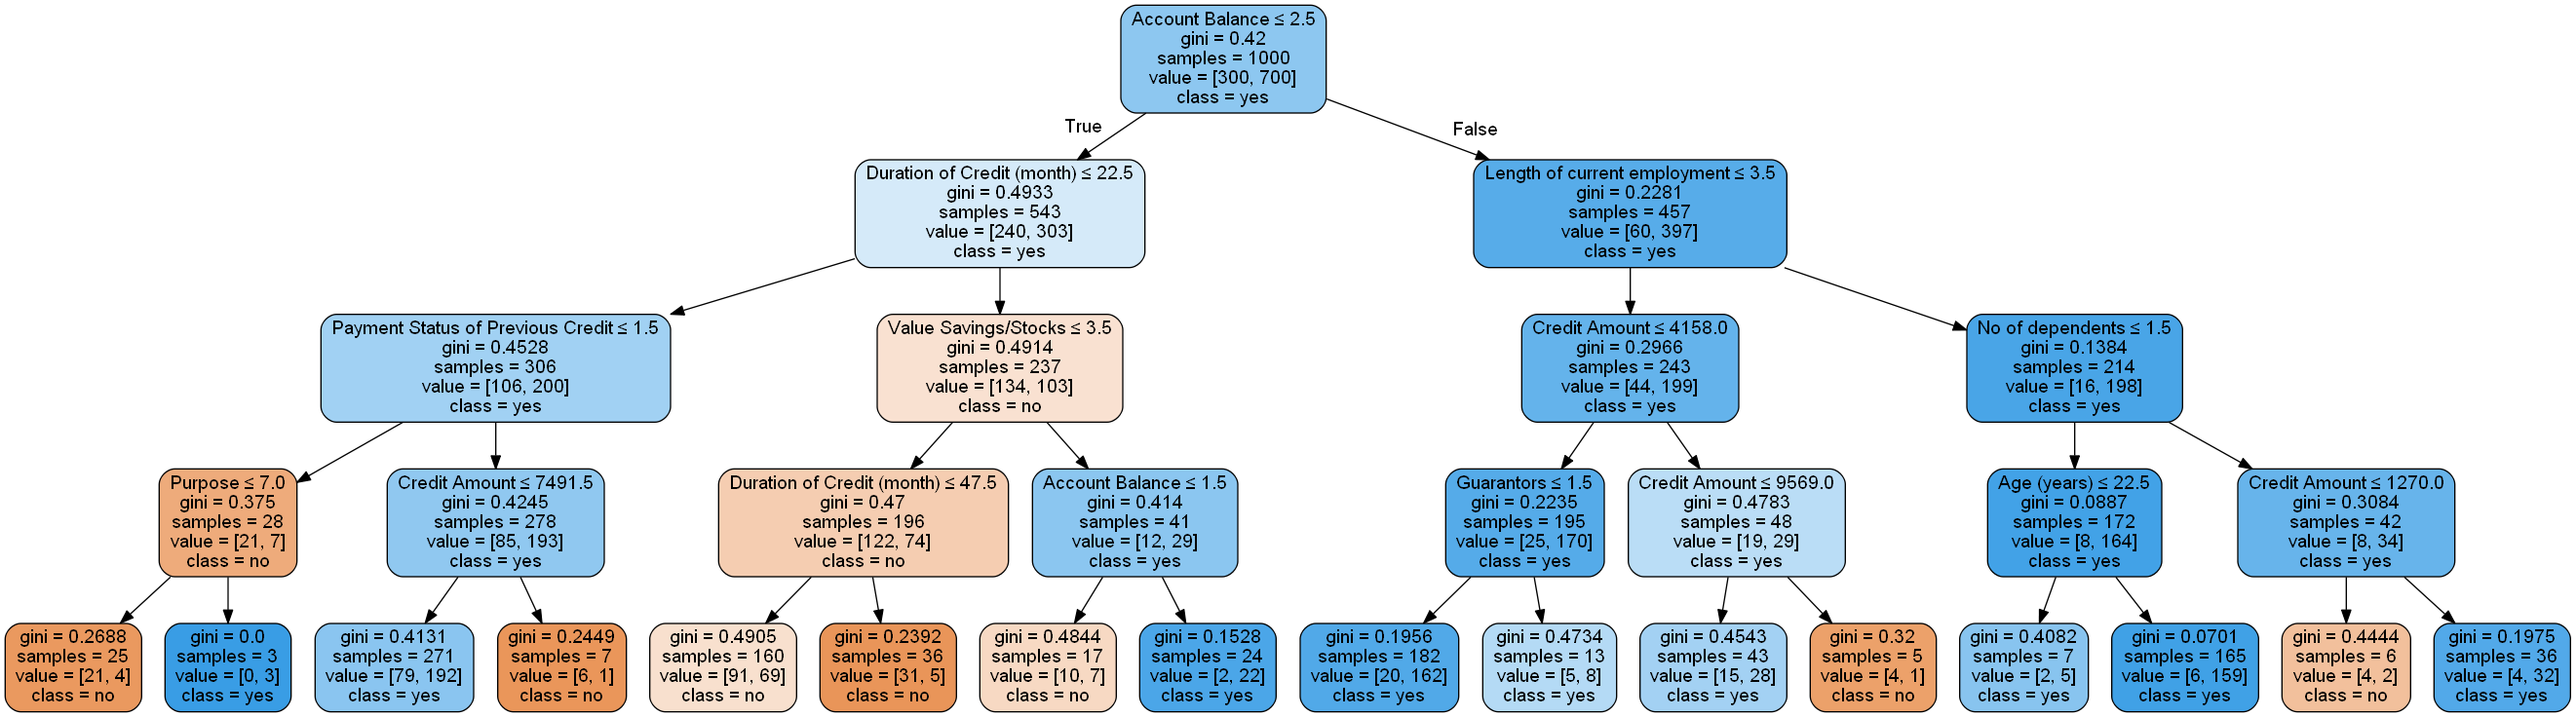

In [96]:
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png())

Проанализируем разбиения полученного дерева. Заметим, что самый информативный признак, находящийся в корне дерева - текущий баланс счета. Он разбивает объекты практически поровну, причем те, кто оказался в левом поддереве(баланс меньше, чем 200 DM), чаще не возвращают кредит, а те, у кого больше денег на счёте, чаще возвращают (что согласуется со здравым смыслом). Признаки на следующем уровне - длительность кредита и время работы на текущем месте. Те, у кого большая продолжительность кредита платят реже, чем те, у кого продолжительность меньше. Причем люди, у которого кредит взят на большой срок, и у которых нет сбережений или небольшое количество денег на счете скорее всего не выплатят.
Не очень согласуется со здравым смыслом то, что если у человека достаточно много денег на счете($\geq$200 DM), он довольно долго работает на одном месте($\geq$ 4 лет) и есть люди, за которых человек несёт ответственность, то если он берет маленький кредит, дерево дает ответ нет, а на большой кредит - ответ да. 

In [64]:
from sklearn import model_selection

In [129]:
data = data.sample(frac=1)

depth = np.arange(1, 15)
score = np.array([model_selection.cross_val_score(tree.DecisionTreeClassifier(max_depth=depth[i]), data.iloc[:, 1:],
                                                     data[[0]], cv=model_selection.KFold(n_splits=5)).mean() 
                     for i in range(depth.size)])

In [130]:
data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex and Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
959,0,2,24,2,3,3092,2,2,3,4,...,2,3,22,3,1,1,3,1,2,1
118,1,4,9,4,6,936,3,5,4,3,...,2,3,52,3,2,2,3,1,2,1
142,1,2,24,2,3,5084,5,5,2,2,...,4,3,42,3,2,1,3,1,2,1
86,1,4,24,4,1,2346,1,4,4,3,...,3,3,35,3,2,2,3,1,2,1
540,0,2,9,2,3,1670,1,2,4,2,...,2,3,22,3,2,1,3,1,2,1


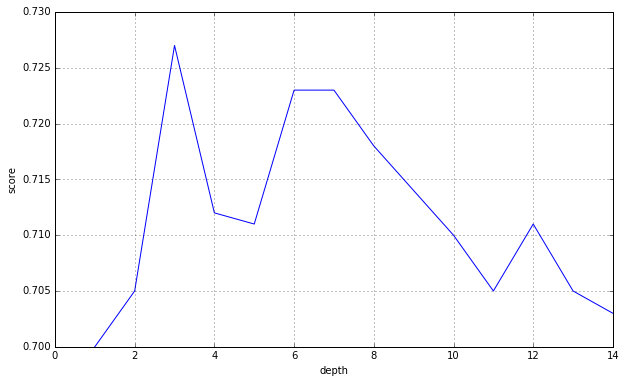

In [131]:
plt.figure(figsize=(10, 6))

plt.plot(depth, score)
plt.xlabel("depth")
plt.ylabel("score")
plt.grid()
plt.show()

Из графика видно, что оптимальное качество достигается на k = 3(результат меняется между 3 и 6 при перемешивании выборки).